# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('cleaned_cars.csv')

df

,url,brand,model,price,mileage,fuel_type,color,gearbox,power,engine_size,...,body_type,doors,seats,drivetrain,emission_class,condition,upholstery,upholstery_color,year,country
0,https://www.autoscout24.com/offers/alfa-romeo-...,alfa romeo,159,5500.0,233685.0,diesel,red,manual,136.0,1956.0,...,sedan,4.0,5.0,front,134.0,used,grey,NaN,2011.0,it
1,https://www.autoscout24.com/offers/alfa-romeo-...,alfa romeo,159,13990.0,134000.0,gasoline,red,manual,200.0,1742.0,...,sedan,4.0,5.0,front,NaN,used,NaN,NaN,2010.0,es
2,https://www.autoscout24.com/offers/renault-oth...,renault,NaN,2300.0,27000.0,gasoline,yellow,manual,80.0,800.0,...,sedan,NaN,NaN,NaN,NaN,used,NaN,alcantara,1963.0,be
3,https://www.autoscout24.com/offers/opel-antara...,opel,antara,3499.0,212575.0,gasoline,black,manual,140.0,2405.0,...,off-road/pick-up,5.0,5.0,4wd,229.0,used,NaN,metallic,2008.0,nl
4,https://www.autoscout24.com/offers/alfa-romeo-...,alfa romeo,giulia,39800.0,7100.0,gasoline,white,automatic,280.0,1995.0,...,sedan,4.0,4.0,front,NaN,employee's car,full leather,black,2023.0,de
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15412,https://www.autoscout24.com/offers/tesla-model...,tesla,model 3,31000.0,24000.0,electric,white,automatic,120.0,NaN,...,sedan,5.0,5.0,rear,NaN,used,full leather,black,2020.0,it
15413,https://www.autoscout24.com/offers/tesla-model...,tesla,model 3,28590.0,49393.0,electric,white,automatic,325.0,NaN,...,sedan,4.0,5.0,rear,NaN,used,NaN,metallic,2020.0,es
15414,https://www.autoscout24.com/offers/tesla-model...,tesla,model y,57900.0,7749.0,electric,black,automatic,534.0,NaN,...,off-road/pick-up,5.0,5.0,4wd,NaN,used,full leather,black,2023.0,nl
15415,https://www.autoscout24.com/offers/tesla-model...,tesla,model y,59900.0,2500.0,electric,grey,NaN,480.0,NaN,...,sedan,5.0,5.0,4wd,NaN,used,full leather,black,2023.0,fr


In [3]:
# Drop the url column
df = df.drop('url', axis=1)

df

,brand,model,price,mileage,fuel_type,color,gearbox,power,engine_size,seller,body_type,doors,seats,drivetrain,emission_class,condition,upholstery,upholstery_color,year,country
0,alfa romeo,159,5500.0,233685.0,diesel,red,manual,136.0,1956.0,dealer,sedan,4.0,5.0,front,134.0,used,grey,NaN,2011.0,it
1,alfa romeo,159,13990.0,134000.0,gasoline,red,manual,200.0,1742.0,dealer,sedan,4.0,5.0,front,NaN,used,NaN,NaN,2010.0,es
2,renault,NaN,2300.0,27000.0,gasoline,yellow,manual,80.0,800.0,dealer,sedan,NaN,NaN,NaN,NaN,used,NaN,alcantara,1963.0,be
3,opel,antara,3499.0,212575.0,gasoline,black,manual,140.0,2405.0,dealer,off-road/pick-up,5.0,5.0,4wd,229.0,used,NaN,metallic,2008.0,nl
4,alfa romeo,giulia,39800.0,7100.0,gasoline,white,automatic,280.0,1995.0,dealer,sedan,4.0,4.0,front,NaN,employee's car,full leather,black,2023.0,de
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15412,tesla,model 3,31000.0,24000.0,electric,white,automatic,120.0,NaN,private seller,sedan,5.0,5.0,rear,NaN,used,full leather,black,2020.0,it
15413,tesla,model 3,28590.0,49393.0,electric,white,automatic,325.0,NaN,dealer,sedan,4.0,5.0,rear,NaN,used,NaN,metallic,2020.0,es
15414,tesla,model y,57900.0,7749.0,electric,black,automatic,534.0,NaN,private seller,off-road/pick-up,5.0,5.0,4wd,NaN,used,full leather,black,2023.0,nl
15415,tesla,model y,59900.0,2500.0,electric,grey,NaN,480.0,NaN,dealer,sedan,5.0,5.0,4wd,NaN,used,full leather,black,2023.0,fr


In [4]:
# Check if model column has any missing values
print(df['model'].isnull().sum())

# Replace the missing values with the most frequent value for the corresponding brand
df['model'] = df.groupby('brand')['model'].transform(lambda x: x.fillna(x.mode()[0]))

print(df['model'].isnull().sum())

219
0


In [5]:
# Use a unique id for each model (brand + model)
df['model'] = df['brand'] + '_' + df['model']

df

,brand,model,price,mileage,fuel_type,color,gearbox,power,engine_size,seller,body_type,doors,seats,drivetrain,emission_class,condition,upholstery,upholstery_color,year,country
0,alfa romeo,alfa romeo_159,5500.0,233685.0,diesel,red,manual,136.0,1956.0,dealer,sedan,4.0,5.0,front,134.0,used,grey,NaN,2011.0,it
1,alfa romeo,alfa romeo_159,13990.0,134000.0,gasoline,red,manual,200.0,1742.0,dealer,sedan,4.0,5.0,front,NaN,used,NaN,NaN,2010.0,es
2,renault,renault_clio,2300.0,27000.0,gasoline,yellow,manual,80.0,800.0,dealer,sedan,NaN,NaN,NaN,NaN,used,NaN,alcantara,1963.0,be
3,opel,opel_antara,3499.0,212575.0,gasoline,black,manual,140.0,2405.0,dealer,off-road/pick-up,5.0,5.0,4wd,229.0,used,NaN,metallic,2008.0,nl
4,alfa romeo,alfa romeo_giulia,39800.0,7100.0,gasoline,white,automatic,280.0,1995.0,dealer,sedan,4.0,4.0,front,NaN,employee's car,full leather,black,2023.0,de
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15412,tesla,tesla_model 3,31000.0,24000.0,electric,white,automatic,120.0,NaN,private seller,sedan,5.0,5.0,rear,NaN,used,full leather,black,2020.0,it
15413,tesla,tesla_model 3,28590.0,49393.0,electric,white,automatic,325.0,NaN,dealer,sedan,4.0,5.0,rear,NaN,used,NaN,metallic,2020.0,es
15414,tesla,tesla_model y,57900.0,7749.0,electric,black,automatic,534.0,NaN,private seller,off-road/pick-up,5.0,5.0,4wd,NaN,used,full leather,black,2023.0,nl
15415,tesla,tesla_model y,59900.0,2500.0,electric,grey,NaN,480.0,NaN,dealer,sedan,5.0,5.0,4wd,NaN,used,full leather,black,2023.0,fr


## Null handling

In [6]:
# Check if price column has any missing values
print(df['price'].isnull().sum())

# Check if price column has any zero values
print(df['price'].eq(0).sum())

0
0


In [7]:
# Check if mileage column has any missing values
print(df['mileage'].isnull().sum())

# Use the median value to replace the missing values in the mileage column
df['mileage'] = df['mileage'].fillna(df['mileage'].median())

print(df['mileage'].isnull().sum())

df

181
0


,brand,model,price,mileage,fuel_type,color,gearbox,power,engine_size,seller,body_type,doors,seats,drivetrain,emission_class,condition,upholstery,upholstery_color,year,country
0,alfa romeo,alfa romeo_159,5500.0,233685.0,diesel,red,manual,136.0,1956.0,dealer,sedan,4.0,5.0,front,134.0,used,grey,NaN,2011.0,it
1,alfa romeo,alfa romeo_159,13990.0,134000.0,gasoline,red,manual,200.0,1742.0,dealer,sedan,4.0,5.0,front,NaN,used,NaN,NaN,2010.0,es
2,renault,renault_clio,2300.0,27000.0,gasoline,yellow,manual,80.0,800.0,dealer,sedan,NaN,NaN,NaN,NaN,used,NaN,alcantara,1963.0,be
3,opel,opel_antara,3499.0,212575.0,gasoline,black,manual,140.0,2405.0,dealer,off-road/pick-up,5.0,5.0,4wd,229.0,used,NaN,metallic,2008.0,nl
4,alfa romeo,alfa romeo_giulia,39800.0,7100.0,gasoline,white,automatic,280.0,1995.0,dealer,sedan,4.0,4.0,front,NaN,employee's car,full leather,black,2023.0,de
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15412,tesla,tesla_model 3,31000.0,24000.0,electric,white,automatic,120.0,NaN,private seller,sedan,5.0,5.0,rear,NaN,used,full leather,black,2020.0,it
15413,tesla,tesla_model 3,28590.0,49393.0,electric,white,automatic,325.0,NaN,dealer,sedan,4.0,5.0,rear,NaN,used,NaN,metallic,2020.0,es
15414,tesla,tesla_model y,57900.0,7749.0,electric,black,automatic,534.0,NaN,private seller,off-road/pick-up,5.0,5.0,4wd,NaN,used,full leather,black,2023.0,nl
15415,tesla,tesla_model y,59900.0,2500.0,electric,grey,NaN,480.0,NaN,dealer,sedan,5.0,5.0,4wd,NaN,used,full leather,black,2023.0,fr


In [8]:
# Check if fuel_type column has any missing values
print(df['fuel_type'].isnull().sum())

# Step 1: Calculate the most frequent value for the fuel_type column
most_frequent_value = df['fuel_type'].mode()[0]

# Step 2: Replace the missing values in the fuel_type column with the most frequent value
df['fuel_type'] = df['fuel_type'].fillna(most_frequent_value)

print(df['fuel_type'].isnull().sum())

26
0


In [9]:
# Check if color column has any missing values
print(df['color'].isnull().sum())

# Replace the missing values with the most frequent value for the color column
df['color'] = df['color'].fillna(df['color'].mode()[0])

print(df['color'].isnull().sum())

110
0


In [10]:
# Step 1: Calculate the most common gearbox for each model
most_common_gearbox = df.groupby('model')['gearbox'].agg(pd.Series.mode)

# Step 2: Define a function to apply to each row which fills missing gearbox values
def fill_gearbox(row):
    if pd.isna(row['gearbox']):
        return most_common_gearbox[row['model']]
    else:
        return row['gearbox']

# Step 3: Apply the function to fill missing gearbox values
df['gearbox'] = df.apply(fill_gearbox, axis=1)

# Check the result
print(df['gearbox'].isnull().sum())


0


In [11]:
# Check if power column has any missing values
print(df['power'].isnull().sum())

# Step 1: Calculate the median power for each model
median_power = df.groupby('model')['power'].median()

# Step 2: Define a function to apply to each row which fills missing power values
def fill_power(row):
    if pd.isna(row['power']):
        return median_power[row['model']]
    else:
        return row['power']

# Step 3: Apply the function to fill missing power values
df['power'] = df.apply(fill_power, axis=1)

# Check the result
print(df['power'].isnull().sum())

236
9


In [12]:
# For the remaining missing values in the power column, replace them with the median power of the brand
df['power'] = df.groupby('brand')['power'].transform(lambda x: x.fillna(x.median()))

print(df['power'].isnull().sum())

0


In [13]:
# Check if engine_size column has any missing values
print(df['engine_size'].isnull().sum())

# Step 1: Calculate the median engine_size for each model
median_engine_size = df.groupby('model')['engine_size'].median()

# Step 2: Define a function to apply to each row which fills missing engine_size values
def fill_engine_size(row):
    if pd.isna(row['engine_size']):
        return median_engine_size[row['model']]
    else:
        return row['engine_size']

# Step 3: Apply the function to fill missing engine_size values
df['engine_size'] = df.apply(fill_engine_size, axis=1)

# Check the result
print(df['engine_size'].isnull().sum())

1626
139


In [14]:
# For the remaining missing values in the engine_size column, replace them with the median engine_size of the brand
df['engine_size'] = df.groupby('brand')['engine_size'].transform(lambda x: x.fillna(x.median()))

print(df['engine_size'].isnull().sum())

0


In [15]:
# Check if seller column has any missing values
print(df['seller'].isnull().sum())

0


In [16]:
# Check if body_type column has any missing values
print(df['body_type'].isnull().sum())

0


In [17]:
# Check if doors column has any missing values
print(df['doors'].isnull().sum())

# Step 1: Calculate the most common doors for each model 
most_common_doors = df.groupby('model')['doors'].agg(pd.Series.mode)

# Step 2: Define a function to apply to each row which fills missing doors values and doors with incorrect values
def fill_doors(row):
    if pd.isna(row['doors']) or row['doors'] not in ['2', '3', '4', '5', '6', '7']:
        return most_common_doors[row['model']]
    else:
        return row['doors']

# Step 3: Apply the function to fill missing doors values
df['doors'] = df.apply(fill_doors, axis=1)

print(df['doors'].isnull().sum())

4264
0


In [18]:
# Convert the doors column to integer type when possible and replace any other values with the most common value
df['doors'] = pd.to_numeric(df['doors'], errors='coerce')
df['doors'] = df['doors'].fillna(df['doors'].mode()[0]).astype(int)

np.unique(df['doors'])

array([2, 3, 4, 5])

In [19]:
# Check if seats column has any missing values
print(df['seats'].isnull().sum())

# Step 1: Calculate the most common seats for each model
most_common_seats = df.groupby('model')['seats'].agg(pd.Series.mode)

# Step 2: Define a function to apply to each row which fills missing seats values
def fill_seats(row):
    if pd.isna(row['seats']) or isinstance(row['seats'], np.ndarray):
        return most_common_seats[row['model']]
    else:
        return row['seats']

# Step 3: Apply the function to fill missing seats values
df['seats'] = df.apply(fill_seats, axis=1)

print(df['seats'].isnull().sum())

1329
0


In [20]:
# Convert the seats column to integer type when possible and replace any other values with the most common value
df['seats'] = pd.to_numeric(df['seats'], errors='coerce')
df['seats'] = df['seats'].fillna(df['seats'].mode()[0]).astype(int)

np.unique(df['seats'])

array([2, 4, 5, 7])

In [21]:
# Check if drivetrain column has any missing values
print(df['drivetrain'].isnull().sum())

# Step 1: Calculate the most common drivetrain for each model
most_common_drivetrain = df.groupby('model')['drivetrain'].agg(pd.Series.mode)

# Step 2: Define a function to apply to each row which fills missing drivetrain values
def fill_drivetrain(row):
    if pd.isna(row['drivetrain']):
        return most_common_drivetrain[row['model']]
    else:
        return row['drivetrain']

# Step 3: Apply the function to fill missing drivetrain values
df['drivetrain'] = df.apply(fill_drivetrain, axis=1)

print(df['drivetrain'].isnull().sum())


3886
0


In [22]:
# Check if emission_class column has any missing values
print(df['emission_class'].isnull().sum())

# Step 1: Calculate the most common emission_class for each model
most_common_emission_class = df.groupby('model')['emission_class'].agg(pd.Series.mean)

# Step 2: Define a function to apply to each row which fills missing emission_class values
def fill_emission_class(row):
    if pd.isna(row['emission_class']):
        return most_common_emission_class[row['model']]
    else:
        return row['emission_class']

# Step 3: Apply the function to fill missing emission_class values
df['emission_class'] = df.apply(fill_emission_class, axis=1)

print(df['emission_class'].isnull().sum())

# Replace the remaining missing values in the emission_class column with the most frequent value for the corresponding brand
df['emission_class'] = df.groupby('brand')['emission_class'].transform(lambda x: x.fillna(x.mode()[0]))

print(df['emission_class'].isnull().sum())

6048
455
0


In [23]:
# Check if condition column has any missing values
print(df['condition'].isnull().sum())

0


In [24]:
# Check if upholstery column has any missing values
print(df['upholstery'].isnull().sum())

# Step 1: Calculate the most common upholstery for each model
most_common_upholstery = df.groupby('model')['upholstery'].agg(pd.Series.mode)

# Step 2: Define a function to apply to each row which fills missing upholstery values
def fill_upholstery(row):
    if pd.isna(row['upholstery']):
        return most_common_upholstery[row['model']]
    else:
        return row['upholstery']
        
# Step 3: Apply the function to fill missing upholstery values
df['upholstery'] = df.apply(fill_upholstery, axis=1)

print(df['upholstery'].isnull().sum())

4414
0


In [25]:
# Check if year column has any missing values
print(df['year'].isnull().sum())

# Step 1: Calculate the median year for each model
median_year = df.groupby('model')['year'].median()

# Step 2: Define a function to apply to each row which fills missing year values
def fill_year(row):
    if pd.isna(row['year']):
        return median_year[row['model']]
    else:
        return row['year']

# Step 3: Apply the function to fill missing year values
df['year'] = df.apply(fill_year, axis=1)

print(df['year'].isnull().sum())

# For the remaining missing values in the year column, replace them with the median year of the brand
df['year'] = df.groupby('brand')['year'].transform(lambda x: x.fillna(x.median()))

print(df['year'].isnull().sum())

718
2
0


In [26]:
# Check if country column has any missing values
print(df['country'].isnull().sum())

0


In [27]:
# Check if upholstery_color column has any missing values
print(df['upholstery_color'].isnull().sum())

# Replace the missing values with the most frequent value for the corresponding brand
df['upholstery_color'] = df.groupby('brand')['upholstery_color'].transform(lambda x: x.fillna(x.mode()[0]))

print(df['upholstery_color'].isnull().sum())

3964
0


In [28]:
# Check how many missing values are in each column
for column in df.columns:
    print(column, df[column].isnull().sum())

brand 0
model 0
price 0
mileage 0
fuel_type 0
color 0
gearbox 0
power 0
engine_size 0
seller 0
body_type 0
doors 0
seats 0
drivetrain 0
emission_class 0
condition 0
upholstery 0
upholstery_color 0
year 0
country 0


In [29]:
# Drop upholstery column as it is the same as upholstery_color
df = df.drop('upholstery', axis=1)

In [30]:
# Some object columns contains ndarrays that need to be converted to strings
for column in df.columns:
    if df[column].dtype == 'object':
        # Check if the column contains ndarrays
        if isinstance(df[column].iloc[0], np.ndarray):
            # Convert the ndarrays to strings
            df[column] = df[column].apply(lambda x: ', '.join(x))
        else:
            # Convert the column to string type
            df[column] = df[column].astype(str)

df


,brand,model,price,mileage,fuel_type,color,gearbox,power,engine_size,seller,body_type,doors,seats,drivetrain,emission_class,condition,upholstery_color,year,country
0,alfa romeo,alfa romeo_159,5500.0,233685.0,diesel,red,manual,136.0,1956.0,dealer,sedan,5,5,front,134.000000,used,metallic,2011.0,it
1,alfa romeo,alfa romeo_159,13990.0,134000.0,gasoline,red,manual,200.0,1742.0,dealer,sedan,5,5,front,160.222222,used,metallic,2010.0,es
2,renault,renault_clio,2300.0,27000.0,gasoline,yellow,manual,80.0,800.0,dealer,sedan,5,5,front,120.425532,used,alcantara,1963.0,be
3,opel,opel_antara,3499.0,212575.0,gasoline,black,manual,140.0,2405.0,dealer,off-road/pick-up,5,5,4wd,229.000000,used,metallic,2008.0,nl
4,alfa romeo,alfa romeo_giulia,39800.0,7100.0,gasoline,white,automatic,280.0,1995.0,dealer,sedan,4,4,front,136.750000,employee's car,black,2023.0,de
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15412,tesla,tesla_model 3,31000.0,24000.0,electric,white,automatic,120.0,0.0,private seller,sedan,5,5,rear,0.000000,used,black,2020.0,it
15413,tesla,tesla_model 3,28590.0,49393.0,electric,white,automatic,325.0,0.0,dealer,sedan,5,5,rear,0.000000,used,metallic,2020.0,es
15414,tesla,tesla_model y,57900.0,7749.0,electric,black,automatic,534.0,0.0,private seller,off-road/pick-up,5,5,4wd,0.000000,used,black,2023.0,nl
15415,tesla,tesla_model y,59900.0,2500.0,electric,grey,automatic,480.0,0.0,dealer,sedan,5,5,4wd,0.000000,used,black,2023.0,fr


In [31]:
# Check the data types of the columns
for column in df.columns:
    print(column, df[column].dtype)

brand object
model object
price float64
mileage float64
fuel_type object
color object
gearbox object
power float64
engine_size float64
seller object
body_type object
doors int64
seats int64
drivetrain object
emission_class float64
condition object
upholstery_color object
year float64
country object


In [32]:
# Check if any missing values are left
for column in df.columns:
    print(column, df[column].isnull().sum())

brand 0
model 0
price 0
mileage 0
fuel_type 0
color 0
gearbox 0
power 0
engine_size 0
seller 0
body_type 0
doors 0
seats 0
drivetrain 0
emission_class 0
condition 0
upholstery_color 0
year 0
country 0


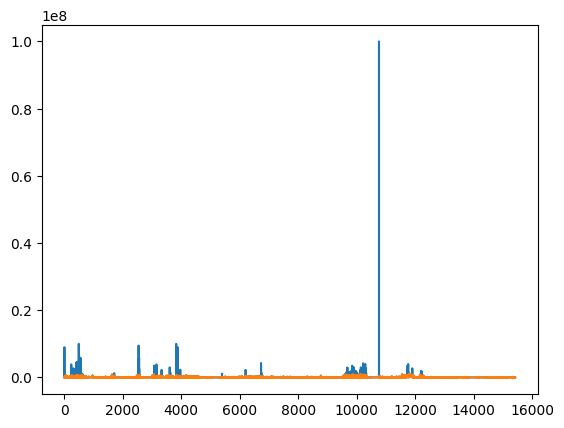

In [33]:
# Plot the distribution of the price column
plt.plot(df['price'])

# Remove the outliers in the price column
df = df[df['price'] < 1000000]

# Plot the distribution of the price column after removing the outliers
plt.plot(df['price'])

In [34]:
# Shuffle the data
df = df.sample(frac=1, random_state=0)

# Normalization and one-hot encoding

In [35]:
# Columns to one-hot encode
one_hot_encode_cols = ['brand', 'model', 'fuel_type', 'gearbox', 'color', 'seller', 'body_type', 'drivetrain', 'country', 'condition', 'upholstery_color']

# One-hot encode the columns
df = pd.get_dummies(df, columns=one_hot_encode_cols)

In [36]:
# Export the cleaned data to a new CSV file
df.to_csv('cleaned_cars_v2.csv', index=False)

# Model selection

In [37]:
# Load the cleaned data
df = pd.read_csv('cleaned_cars_v2.csv')

In [38]:
# Split the data into features and target
y = df['price']
X = df.drop('price', axis=1)

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Convert the data to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Print shapes of the training, validation, and testing sets
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)


(9183, 1279)
(3061, 1279)
(3061, 1279)
(9183,)
(3061,)
(3061,)


In [39]:
# Instantiate the model
rf = RandomForestRegressor(random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
train_preds = rf.predict(X_train)
val_preds = rf.predict(X_val)

# Calculate the mean squared error
train_mse = mean_squared_error(y_train, train_preds)
val_mse = mean_squared_error(y_val, val_preds)

print('Train MSE:', train_mse)
print('Validation MSE:', val_mse)

Train MSE: 157381103.5697625
Validation MSE: 1075684679.5916238


In [44]:
# Make predictions on the test set
test_preds = rf.predict(X_test)

# Print regression metrics
test_mse = mean_squared_error(y_test, test_preds)
print('Test RMSE:', np.sqrt(test_mse))  
# r-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, test_preds)
print('Test R2:', r2)

# Print the results on a few test set examples
for i in range(50):
    print('Predicted:', test_preds[i])
    print('Actual:', y_test[i])
    print()

Test RMSE: 31936.276034684943
Test R2: 0.9095990736279217
Predicted: 34038.15
Actual: 36200.0

Predicted: 4280.31
Actual: 4790.0

Predicted: 271247.25
Actual: 269000.0

Predicted: 23930.57
Actual: 19950.0

Predicted: 13992.07
Actual: 16995.0

Predicted: 27690.101666666666
Actual: 25300.0

Predicted: 29832.06
Actual: 27800.0

Predicted: 10811.11
Actual: 9000.0

Predicted: 22784.61
Actual: 28900.0

Predicted: 14581.68
Actual: 16750.0

Predicted: 268960.02
Actual: 274000.0

Predicted: 17341.34
Actual: 21600.0

Predicted: 2826.4
Actual: 1.0

Predicted: 13533.46
Actual: 13945.0

Predicted: 3285.79
Actual: 3449.0

Predicted: 13472.31
Actual: 12900.0

Predicted: 52356.87
Actual: 42490.0

Predicted: 278022.61
Actual: 279900.0

Predicted: 14728.41
Actual: 11900.0

Predicted: 11026.42
Actual: 9950.0

Predicted: 10246.34
Actual: 14700.0

Predicted: 428396.46
Actual: 489500.0

Predicted: 27403.82
Actual: 22900.0

Predicted: 17604.08
Actual: 17990.0

Predicted: 17037.19
Actual: 13800.0

Predicted: 

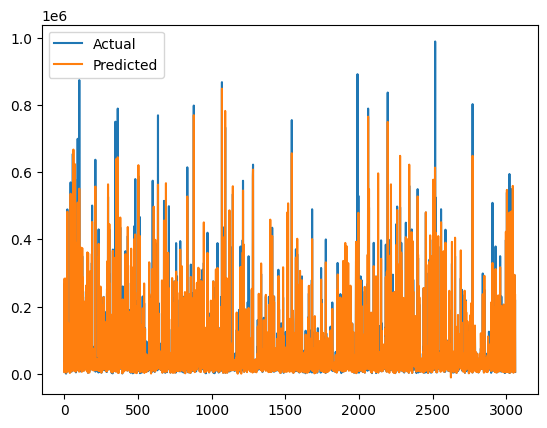

In [51]:
# Plot the comparison between the actual and predicted prices
plt.plot(y_test, label='Actual')
plt.plot(test_preds, label='Predicted')
plt.legend()
plt.show()

In [48]:
# Instantiate the model
xgb = XGBRegressor(random_state=42)

# Fit the model
xgb.fit(X_train, y_train)

# Make predictions
train_preds = xgb.predict(X_train)
val_preds = xgb.predict(X_val)

# Calculate the mean squared error
train_mse = mean_squared_error(y_train, train_preds)
val_mse = mean_squared_error(y_val, val_preds)

print('Train MSE:', train_mse)
print('Validation MSE:', val_mse)

Train MSE: 104810366.56328191
Validation MSE: 1010625400.4555045


In [49]:
# Make predictions on the test set
test_preds = xgb.predict(X_test)

# Print regression metrics
test_mse = mean_squared_error(y_test, test_preds)
print('Test RMSE:', np.sqrt(test_mse))

# r-squared
r2 = r2_score(y_test, test_preds)
print('Test R2:', r2)

# Print the results on a few test set examples
for i in range(20):
    print('Predicted:', test_preds[i])
    print('Actual:', y_test[i])
    print()

Test RMSE: 32768.3035775494
Test R2: 0.9048273304948017
Predicted: 30210.562
Actual: 36200.0

Predicted: 3819.6985
Actual: 4790.0

Predicted: 283252.75
Actual: 269000.0

Predicted: 21496.457
Actual: 19950.0

Predicted: 13499.893
Actual: 16995.0

Predicted: 30708.24
Actual: 25300.0

Predicted: 27538.559
Actual: 27800.0

Predicted: 10409.498
Actual: 9000.0

Predicted: 21693.855
Actual: 28900.0

Predicted: 27746.707
Actual: 16750.0

Predicted: 245860.64
Actual: 274000.0

Predicted: 19617.684
Actual: 21600.0

Predicted: 4531.747
Actual: 1.0

Predicted: 15613.843
Actual: 13945.0

Predicted: 3082.9248
Actual: 3449.0

Predicted: 16360.806
Actual: 12900.0

Predicted: 49904.75
Actual: 42490.0

Predicted: 286294.47
Actual: 279900.0

Predicted: 16949.426
Actual: 11900.0

Predicted: 10440.138
Actual: 9950.0



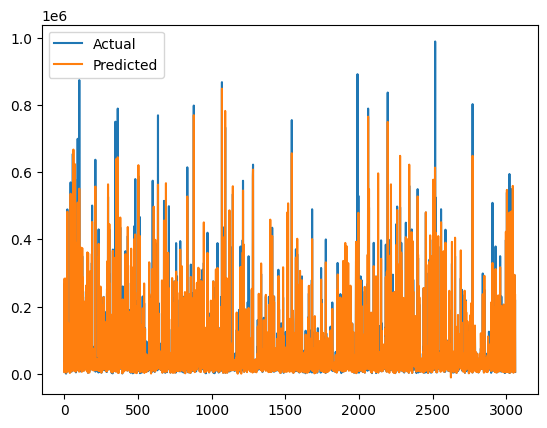

In [50]:
# Plot a comparison of the actual and predicted prices
plt.plot(y_test, label='Actual')
plt.plot(test_preds, label='Predicted')
plt.legend()
plt.show()